# Assignment 5 Due Friday, March 17, 2023

This assignment is to be done in teams of 2 people. Please let me know whether you would
like to change your Assignment 4 partner.

### Description of the Data:

This assignment applies pandas to the analysis of COVID-19 case and death numbers 
provided by the The Johns Hopkins University Center for Systems Science and Engineering (CSSE).
CSSE maintains the COVID-19 Data Repository. This database is updated daily and uploaded to 
Kaggle. Here is the Kaggle link.

https://www.kaggle.com/datasets/abhishek14398/world-covid19-data

To avoid download issues, there is shared Google folder of a download of the data. 

The folder contains the following files:

* CONVENIENT_global_confirmed_cases.csv: Daily case totals by country. Rows are indexed by dates, 
  columns are indexed by countries. 

* CONVENIENT_global_deaths.csv: Daily death totals by country. Rows are indexed by dates, 
  columns are indexed by countries. 
  
* CONVENIENT_global_metadata.csv: Provides no additonal information 

* CONVENIENT_us_confirmed_cases.csv: Daily case totals by county by state. Rows are indexed by dates, 
  columns are indexed by counties
  . 
* CONVENIENT_us_deaths.csv:  Daily death totals by county by state. Rows are indexed by dates, 
  columns are indexed by counties
  
* CONVENIENT_us_metadata.csv: Provides the population of each county.

* RAW_global_confirmed_cases.csv: Cumulative daily case totals by country. Rows are indexed by countries,
  columns are indexed by dates starting in January, 2020
  
* RAW_global_deaths.csv: Cumulative daily death totals by country. Rows are indexed by countries,
  columns are indexed by dates starting in January, 2020
  
* RAW_us_confirmed_cases.csv: Cumulative daily case totals by state by county (both in alphabetical order)
. Rows are indexed by state and county,columns are indexed by dates starting in January, 2020.

* RAW_us_deaths.csv: Cumulative daily death totals by state by county (both in alphabetical order)
. Rows are indexed by state and county,columns are indexed by dates starting in January, 2020.

* continents2.csv: A list of countries in alphabetical order giving region and subregion

Note: cumulative means that the value for the date is the total number of cases or deaths up to
and including that date for that county or country. This mean that cumulative data is non-decreasing
over time. The RAW_ files are cumulative. The CONVENIENT files are not.
 

### Data Overview

The primary quantities for understanding the COVID-19 pandemic in a geographic region are the magnitude 
and timing of local maxima of the number of cases and the number of deaths. In order to compare 
data from regions of different total populations, the convention is to use normalized data:

* number of cases per 100,000 people
* number of deaths per 100,000 people

Public health data of this sort are noisy with variations from day to day depending on how
many COVID tests are done and reported for a particular day, whether the day is a weekday or
a weekend day, where tests are available, whether there was a blizzard, and various other
events that people's daily routine. One approach to this is to analyze weekly data, the sum
of the number of cases per week and the number of deaths per week. The weekly data will be
less noisy than daily data, though it will still bounce around (not a technical term) from
week to week. 

### The Assignment

For the assignment, you'll have to pd.read the US and global confirmed cases and deaths (CONVENIENT)
and the US and global cumulative case and death values. 

### 1. The US Data

(a) Choose six states, one from each region of the US according to the map we used for educational
    data (See Handout 5 in Canvas). Create a new dataframe containing only data for your six states.
    
**For each of the six states, carry out steps (b) through (f)**
    
(b) Create a new dataframe that contains weekly sampled data for RAW_ data and
    weekly summed data for CONVENIENT data as described above
    
(c) For each county, normalize the counts by dividing by 100,000. (This is the standard
    normalization, cases per 100,000).) Plot the weekly case totals for the 20 largest counties
    in the state on the same set of axes. (If there are fewer than 20 counties, plot all of 
    the counties.)
    
* Are the plots similar, increasing over the same time periods and decreasing over the
        same time periods?
* Identify the dates/weeks of the local maxima. Are these roughly the same for all 
        counties or do you observe a consistent shift or delay from some counties to others?
* Do the case numbers decrease after a local maximum at the same rate (but obviously
        negative) as the rates increase prior to a local maximum. 
        
(d) Repeat (c) for death weekly death totals. 
    
(e) For the same counties, plot the normalized cumulative case totals obtained by 
    every seven day sampling of the RAW_ data. What is the relationship between these plots
    and those for the case total data?
    
(f) For the same counties, plot the normalized cumulative death totals obtained by 
    every seven day sampling of the RAW_ data. What is the relationship between these plots
    and those for the case total data?
    

### 2. State by State Comparisons

Having identified the weeks of local maximum of weekaly case and death totals for each
    of your six states:
    
(a) Do the local maxima occur in roughly the same weeks for all six states, or do you
    observe that some states lead and others follow? Can you explain the discrepancy by
    geography, climate, or other factors? 
    
(b) Are the normalized values of the maxima in cases and deaths per 100,000 comparable, or
    does it appear that the outbreaks were more significant in some states than in others?
    
(c) Investigate whether your six states had strict or lax COVID policies. Vaccination data
    can be found at the CDC site:
    
https://covid.cdc.gov/covid-data-tracker/#vaccinations_vacc-people-booster-percent-total
    
For masking policies search for COVID Mask Mandates
    
(d) Is there a correlation between COVID policies that you found in (c) to your response 
    to (b)?
    
(e) Can you draw any conclusions about COVID policies based on your answer to (d)? 

### 3. Country subregion Analysis

Using the *continents2.csv* file, select one subregion of the world. Carry out the analysis
    of Problem 1 for your countries, treating each as a county. Is the trajectory of the pandemic
    similar in each country of the subregion? If not, how do they differ? 
    
### What to submit

Since the analysis will take some space, summarize your analyses in the first section of
    your submission. of course, should be written after you've completed your analysis.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load in the Data Files

In [2]:
path1 = 'RAW_us_confirmed_cases.csv'
us_cases_raw = pd.read_csv(path1)

In [3]:
path2 = 'RAW_us_deaths.csv'
us_deaths_raw = pd.read_csv(path2)

In [4]:
path3 = 'CONVENIENT_us_confirmed_cases.csv'
us_cases_conv = pd.read_csv(path3, header = None, low_memory = False)

us_cases_conv = us_cases_conv.transpose()
us_cases_conv.rename(columns = us_cases_conv.iloc[0], inplace = True)
us_cases_conv = us_cases_conv.drop(0)

In [5]:
path4 = 'CONVENIENT_us_deaths.csv'
us_deaths_conv = pd.read_csv(path4, header = None, low_memory = False)

us_deaths_conv = us_deaths_conv.transpose()
us_deaths_conv.rename(columns = us_deaths_conv.iloc[0], inplace = True)
us_deaths_conv = us_deaths_conv.drop(0)

# Individual State Reporting

## Pacific Northwest - Oregon (2)

### Raw COVID Cases

In [6]:
## Partition Data
oregon_cases_raw = us_cases_raw[us_cases_raw['Province_State']=='Oregon']

## Drop Out of OE and Unassigned Rows, no other rows are 0, no further drops required
oregon_cases_raw = oregon_cases_raw.drop(index = [2319, 2324])

In [7]:
## How many confirmed COVID cases in Oregon as of 12 January 2023
np.sum(oregon_cases_raw['1/12/23'])

944618

In [8]:
## Proportion of Oregon who have contracted COVID (OE pop. = 4240137)
np.sum(oregon_cases_raw['1/12/23'])/4240137

0.2227800658327785

In [9]:
## Create New Dataframe of Weekly Data
oregon_cases_data = oregon_cases_raw[oregon_cases_raw.columns[11:]]
oregon_cases_array = np.array(oregon_cases_data)

oregon_weekly_cases_raw = oregon_cases_array[:, ::7]

In [10]:
## Normalize Data (per 100,000)
norm_oregon_weekly_cases_raw = oregon_weekly_cases_raw/100000

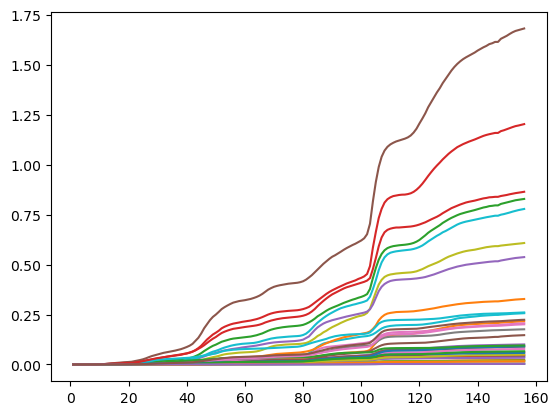

In [11]:
## Plot Data
x = np.arange(1, 157)

for y in np.arange(0, 36):
    plt.plot(x, norm_oregon_weekly_cases_raw[y,:])
    
## plt.legend()
plt.show()

### Daily COVID Cases

In [12]:
## Partitition Data (Oregon.26 and Oregon.31 are the Out of OE and Unassigned Counties, respectively)
oregon_cases_conv = us_cases_conv[us_cases_conv['Province_State'] == 'Oregon']

## Drop Out of OE and Unassigned Rows, no other rows are 0, no further drops required
oregon_cases_conv = oregon_cases_conv.drop(index = [2320, 2325])

In [13]:
## Create New Dataframe of Weekly Data
oregon_cases_data = oregon_cases_conv[oregon_cases_conv.columns[2:]]
oregon_cases_array = np.array(oregon_cases_data, dtype = 'float')

## Sum each 7-day interval to get the weekly totals
oregon_weekly_cases = np.zeros((36, 155))
for j in np.arange(0, 36):
    i = 1
    while (i <= 155):
        oregon_weekly_cases[j, i-1] = oregon_cases_array[j, i*7 - 1] + oregon_cases_array[j, i*7 - 2] + oregon_cases_array[j, i*7 - 3] + oregon_cases_array[j, i*7 - 4] + oregon_cases_array[j, i*7 - 5] + oregon_cases_array[j, i*7 - 6] + oregon_cases_array[j, i*7 - 7]
        i += 1

In [14]:
## Normalize the Data per 100,000
norm_oregon_weekly_cases = oregon_weekly_cases/100000

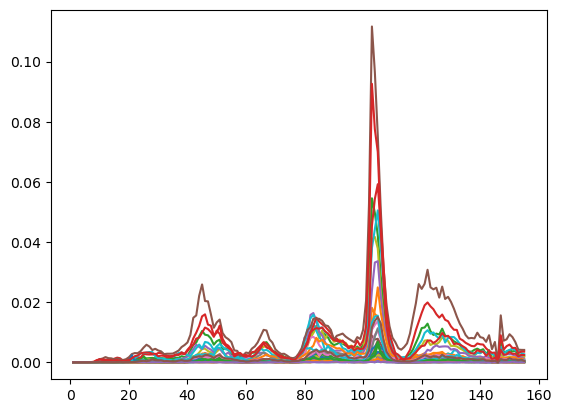

In [15]:
## Plot Data
x = np.arange(1, 156)

for y in np.arange(0, 36):
    plt.plot(x, norm_oregon_weekly_cases[y,:])
    
## plt.legend()
plt.show()

### Raw COVID Deaths

In [16]:
## Partition Data
oregon_deaths_raw = us_deaths_raw[us_deaths_raw['Province_State']=='Oregon']

## Drop Out of OE and Unassigned Rows, no other rows are 0, no further drops required
oregon_deaths_raw = oregon_deaths_raw.drop(index = [2319, 2324])

In [17]:
## How many confirmed COVID cases in Oregon as of 12 January 2023
np.sum(oregon_deaths_raw['1/12/23'])

9078

In [18]:
## Proportion of Oregon who have contracted COVID (OE pop. = 4240137)
np.sum(oregon_deaths_raw['1/12/23'])/4240137

0.0021409685583272425

In [19]:
## Create New Dataframe of Weekly Data
oregon_deaths_data = oregon_deaths_raw[oregon_deaths_raw.columns[12:]]
oregon_deaths_array = np.array(oregon_deaths_data)

oregon_weekly_deaths_raw = oregon_deaths_array[:, ::7]

In [20]:
## Normalize Data (per 100,000)
norm_oregon_weekly_deaths_raw = oregon_weekly_deaths_raw/100000

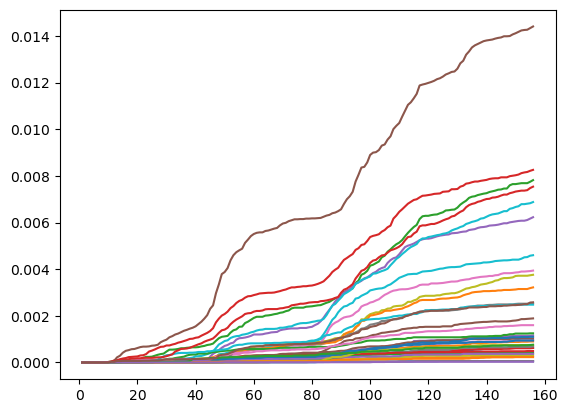

In [21]:
## Plot Data
x = np.arange(1, 157)

for y in np.arange(0, 36):
    plt.plot(x, norm_oregon_weekly_deaths_raw[y,:])
    
## plt.legend()
plt.show()

### Daily COVID Deaths

In [22]:
## Partitition Data
oregon_deaths_conv = us_deaths_conv[us_deaths_conv['Province_State'] == 'Oregon']

## Drop Out of OE and Unassigned Rows, no other rows are 0, no further drops required
oregon_deaths_conv = oregon_deaths_conv.drop(index = [2320, 2325])

In [23]:
## Create New Dataframe of Weekly Data
oregon_deaths_data = oregon_deaths_conv[oregon_deaths_conv.columns[2:]]
oregon_deaths_array = np.array(oregon_deaths_data, dtype = 'float')

## Sum each 7-day interval to get the weekly totals
oregon_weekly_deaths = np.zeros((36, 155))
for j in np.arange(0, 36):
    i = 1
    while (i <= 155):
        oregon_weekly_deaths[j, i-1] = oregon_deaths_array[j, i*7 - 1] + oregon_deaths_array[j, i*7 - 2] + oregon_deaths_array[j, i*7 - 3] + oregon_deaths_array[j, i*7 - 4] + oregon_deaths_array[j, i*7 - 5] + oregon_deaths_array[j, i*7 - 6] + oregon_deaths_array[j, i*7 - 7]
        i += 1

In [24]:
## Normalize the Data per 100,000
norm_oregon_weekly_deaths = oregon_weekly_deaths/100000

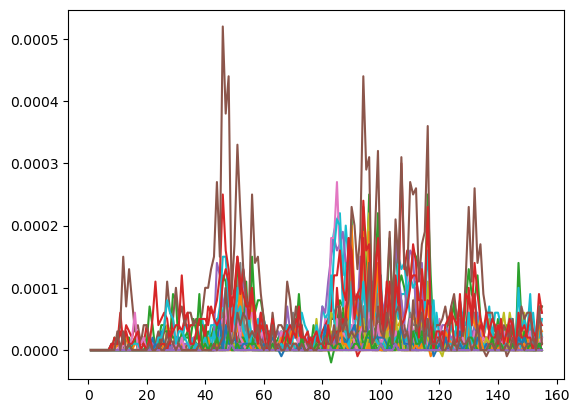

In [25]:
## Plot Data
x = np.arange(1, 156)

for y in np.arange(0, 36):
    plt.plot(x, norm_oregon_weekly_deaths[y,:])
    
## plt.legend()
plt.show()

### Summary

The plots for the raw normalized weekly case and death data have roughly the same shape. Both of these plots showcase that for each county in Oregon, the number of COVID cases and deaths increased and decreased over the same time periods. For the weekly cases, almost each county hit each of their sharpest inclines at around week 105. As for the number of COVID-related deaths, each county experienced a peak at around week 50, and again at around week 110. There is no significant shift/delay between the counties. After these peaks, the amount of cases and deaths appear to level off. One last thing to note is that the Total COVID cases appear to lead the the total COVID-related deaths, which intuitively makes sense. As cases increase, one would expect that the deaths would increase a few weeks later, and vice versa.

The plots for the convenient normalized weekly case and death data portray a similar picture to that of the raw normalized weekly cases and death data. As previously mentioned, with these daily totals, we can precisely see that Oregon suffered the worst around weeks 50, 105, and 120. However, interestingly, the peak weekly deaths never went above 500 for a single week.

## Rocky Mountain Region - Idaho (2)

### Raw COVID Cases

In [26]:
## Partition Data
idaho_cases_raw = us_cases_raw[us_cases_raw['Province_State']=='Idaho']

## Drop Out of ID and Unassigned Rows, no other rows are 0, no further drops required
idaho_cases_raw = idaho_cases_raw.drop(index = [617, 624])

In [27]:
## How many confirmed COVID cases in Idaho as of 12 January 2023
np.sum(idaho_cases_raw['1/12/23'])

513667

In [28]:
## Proportion of Idaho who have contracted COVID (ID pop. = 1939033)
np.sum(idaho_cases_raw['1/12/23'])/1939033

0.26490884889529986

In [29]:
## Create New Dataframe of Weekly Data
idaho_cases_data = idaho_cases_raw[idaho_cases_raw.columns[11:]]
idaho_cases_array = np.array(idaho_cases_data)

idaho_weekly_cases_raw = idaho_cases_array[:, ::7]

In [30]:
## Normalize Data (per 100,000)
norm_idaho_weekly_cases_raw = idaho_weekly_cases_raw/100000

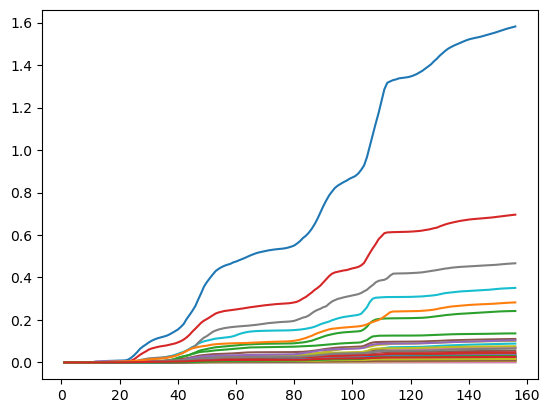

In [31]:
## Plot Data
x = np.arange(1, 157)

for y in np.arange(0, 44):
    plt.plot(x, norm_idaho_weekly_cases_raw[y,:])
    
## plt.legend()
plt.show()

### Daily COVID Cases

In [32]:
## Partitition Data
idaho_cases_conv = us_cases_conv[us_cases_conv['Province_State'] == 'Idaho']

## Drop Out of OE and Unassigned Rows, no other rows are 0, no further drops required
idaho_cases_conv = idaho_cases_conv.drop(index = [618, 625])

In [33]:
## Create New Dataframe of Weekly Data
idaho_cases_data = idaho_cases_conv[idaho_cases_conv.columns[2:]]
idaho_cases_array = np.array(idaho_cases_data, dtype = 'float')

## Sum each 7-day interval to get the weekly totals
idaho_weekly_cases = np.zeros((44, 155))
for j in np.arange(0, 44):
    i = 1
    while (i <= 155):
        idaho_weekly_cases[j, i-1] = idaho_cases_array[j, i*7 - 1] + idaho_cases_array[j, i*7 - 2] + idaho_cases_array[j, i*7 - 3] + idaho_cases_array[j, i*7 - 4] + idaho_cases_array[j, i*7 - 5] + idaho_cases_array[j, i*7 - 6] + idaho_cases_array[j, i*7 - 7]
        i += 1

In [34]:
## Normalize the Data per 100,000
norm_idaho_weekly_cases = idaho_weekly_cases/100000

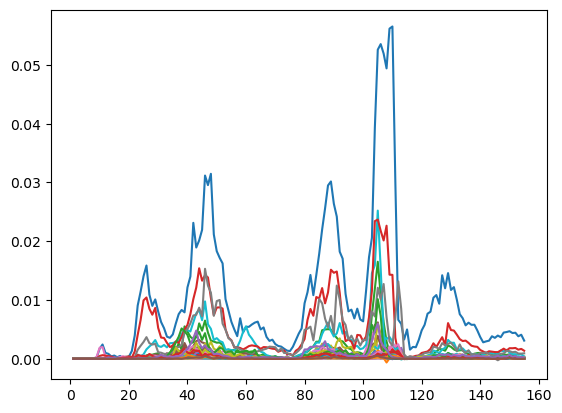

In [35]:
## Plot Data
x = np.arange(1, 156)

for y in np.arange(0, 36):
    plt.plot(x, norm_idaho_weekly_cases[y,:])
    
## plt.legend()
plt.show()

### Raw COVID Deaths

In [36]:
## Partition Data
idaho_deaths_raw = us_deaths_raw[us_deaths_raw['Province_State']=='Idaho']

## Drop Out of ID and Unassigned Rows, no other rows are 0, no further drops required
idaho_deaths_raw = idaho_deaths_raw.drop(index = [617, 624])

In [37]:
## How many confirmed COVID cases in Idaho as of 12 January 2023
np.sum(idaho_deaths_raw['1/12/23'])

5339

In [38]:
## Proportion of Idaho who have contracted COVID (ID pop. = 1939033)
np.sum(idaho_deaths_raw['1/12/23'])/1939033

0.002753434314939457

In [39]:
## Create New Dataframe of Weekly Data
idaho_deaths_data = idaho_deaths_raw[idaho_deaths_raw.columns[12:]]
idaho_deaths_array = np.array(idaho_deaths_data)

idaho_weekly_deaths_raw = idaho_deaths_array[:, ::7]

In [40]:
## Normalize Data (per 100,000)
norm_idaho_weekly_deaths_raw = idaho_weekly_deaths_raw/100000

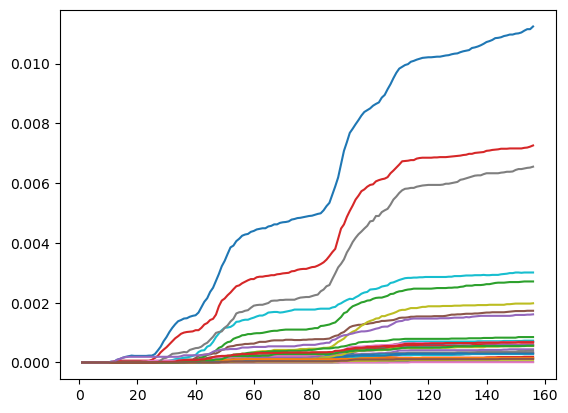

In [41]:
## Plot Data
x = np.arange(1, 157)

for y in np.arange(0, 36):
    plt.plot(x, norm_idaho_weekly_deaths_raw[y,:])
    
## plt.legend()
plt.show()

### Daily COVID Deaths

In [42]:
## Partitition Data (idaho.26 and idaho.31 are the Out of OE and Unassigned Counties, respectively)
idaho_deaths_conv = us_deaths_conv[us_deaths_conv['Province_State'] == 'Idaho']

## Drop Out of OE and Unassigned Rows, no other rows are 0, no further drops required
idaho_deaths_conv = idaho_deaths_conv.drop(index = [618, 625])

In [43]:
## Create New Dataframe of Weekly Data
idaho_deaths_data = idaho_deaths_conv[idaho_deaths_conv.columns[2:]]
idaho_deaths_array = np.array(idaho_deaths_data, dtype = 'float')

## Sum each 7-day interval to get the weekly totals
idaho_weekly_deaths = np.zeros((36, 155))
for j in np.arange(0, 36):
    i = 1
    while (i <= 155):
        idaho_weekly_deaths[j, i-1] = idaho_deaths_array[j, i*7 - 1] + idaho_deaths_array[j, i*7 - 2] + idaho_deaths_array[j, i*7 - 3] + idaho_deaths_array[j, i*7 - 4] + idaho_deaths_array[j, i*7 - 5] + idaho_deaths_array[j, i*7 - 6] + idaho_deaths_array[j, i*7 - 7]
        i += 1

In [44]:
## Normalize the Data per 100,000
norm_idaho_weekly_deaths = idaho_weekly_deaths/100000

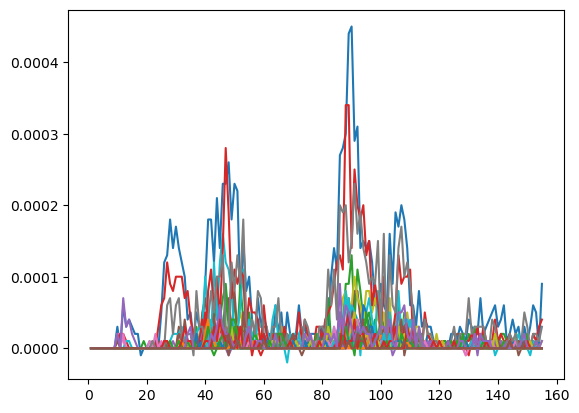

In [45]:
## Plot Data
x = np.arange(1, 156)

for y in np.arange(0, 36):
    plt.plot(x, norm_idaho_weekly_deaths[y,:])
    
## plt.legend()
plt.show()

### Summary

The plots for the raw normalized weekly case and death data have roughly the same shape. Both of these plots showcase that for each county in Idaho, the number of COVID cases and deaths increased and decreased over the same time periods. For the weekly cases, almost each county hit each of their sharpest inclines at around week 90. As for the number of COVID-related deaths, each county experienced a peak at around week 90, and again at around week 110. There is no significant shift/delay between the counties. After these peaks, the amount of cases and deaths appear to level off. One last thing to note is that the Total COVID cases appear to lead the the total COVID-related deaths, which intuitively makes sense. As cases increase, one would expect that the deaths would increase a few weeks later, and vice versa.

The plots for the convenient normalized weekly case and death data portray a similar picture to that of the raw normalized weekly cases and death data. As previously mentioned, with these daily totals, we can precisely see that Idaho suffered the worst around weeks 30, 50, 90, 110. However, interestingly, the peak weekly deaths barely went above 400 for a single week.

## Southwest - Texas (3)

### Raw COVID Cases

In [46]:
## Partition Data
texas_cases_raw = us_cases_raw[us_cases_raw['Province_State']=='Texas']

## Drop Out of TX and Unassigned Rows, no other rows are 0, no further drops required
texas_cases_raw = texas_cases_raw.drop(index = [2883, 2932])

In [47]:
## How many confirmed COVID cases in texas as of 12 January 2023
np.sum(texas_cases_raw['1/12/23'])

8294437

In [48]:
## Proportion of Texas who have contracted COVID (TX pop. = 29145505)
np.sum(texas_cases_raw['1/12/23'])/29145505

0.28458717733660815

In [49]:
## Create New Dataframe of Weekly Data
texas_cases_data = texas_cases_raw[texas_cases_raw.columns[11:]]
texas_cases_array = np.array(texas_cases_data)

texas_weekly_cases_raw = texas_cases_array[:, ::7]

In [50]:
## Normalize Data (per 100,000)
norm_texas_weekly_cases_raw = texas_weekly_cases_raw/100000

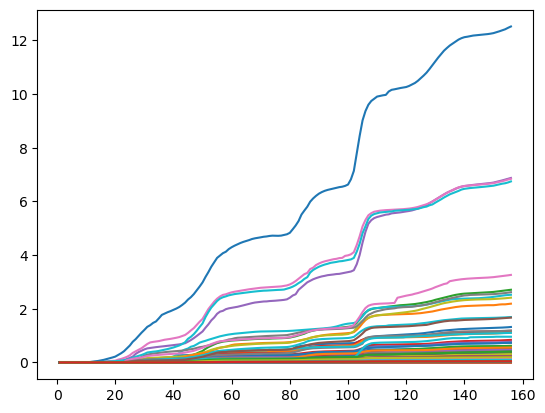

In [51]:
## Plot Data
x = np.arange(1, 157)

for y in np.arange(0, 254):
    plt.plot(x, norm_texas_weekly_cases_raw[y,:])
    
## plt.legend()
plt.show()

### Daily COVID Cases

In [52]:
## Partitition Data (texas.26 and texas.31 are the Out of OE and Unassigned Counties, respectively)
texas_cases_conv = us_cases_conv[us_cases_conv['Province_State'] == 'Texas']

## Drop Out of OE and Unassigned Rows, no other rows are 0, no further drops required
texas_cases_conv = texas_cases_conv.drop(index = [2884, 2933])

In [53]:
## Create New Dataframe of Weekly Data
texas_cases_data = texas_cases_conv[texas_cases_conv.columns[2:]]
texas_cases_array = np.array(texas_cases_data, dtype = 'float')

## Sum each 7-day interval to get the weekly totals
texas_weekly_cases = np.zeros((36, 155))
for j in np.arange(0, 36):
    i = 1
    while (i <= 155):
        texas_weekly_cases[j, i-1] = texas_cases_array[j, i*7 - 1] + texas_cases_array[j, i*7 - 2] + texas_cases_array[j, i*7 - 3] + texas_cases_array[j, i*7 - 4] + texas_cases_array[j, i*7 - 5] + texas_cases_array[j, i*7 - 6] + texas_cases_array[j, i*7 - 7]
        i += 1

In [54]:
## Normalize the Data per 100,000
norm_texas_weekly_cases = texas_weekly_cases/100000

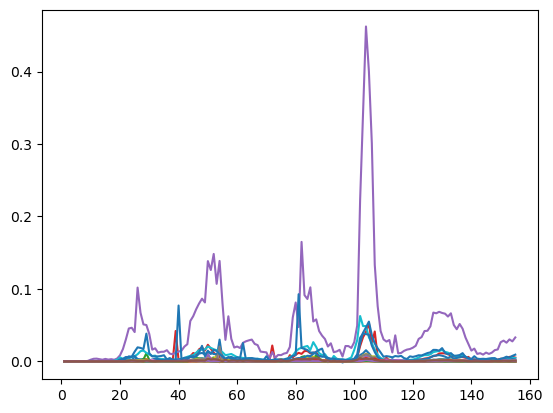

In [55]:
## Plot Data
x = np.arange(1, 156)

for y in np.arange(0, 36):
    plt.plot(x, norm_texas_weekly_cases[y,:])
    
## plt.legend()
plt.show()

### Raw COVID Deaths

In [56]:
## Partition Data
texas_deaths_raw = us_deaths_raw[us_deaths_raw['Province_State']=='Texas']

## Drop Out of TX and Unassigned Rows, no other rows are 0, no further drops required
texas_deaths_raw = texas_deaths_raw.drop(index = [2883, 2932])

In [57]:
## How many confirmed COVID cases in texas as of 12 January 2023
np.sum(texas_deaths_raw['1/12/23'])

91944

In [58]:
## Proportion of Texas who have contracted COVID (TX pop. = 29145505)
np.sum(texas_deaths_raw['1/12/23'])/29145505

0.0031546545513622083

In [59]:
## Create New Dataframe of Weekly Data
texas_deaths_data = texas_deaths_raw[texas_deaths_raw.columns[12:]]
texas_deaths_array = np.array(texas_deaths_data)

texas_weekly_deaths_raw = texas_deaths_array[:, ::7]

In [60]:
## Normalize Data (per 100,000)
norm_texas_weekly_deaths_raw = texas_weekly_deaths_raw/100000

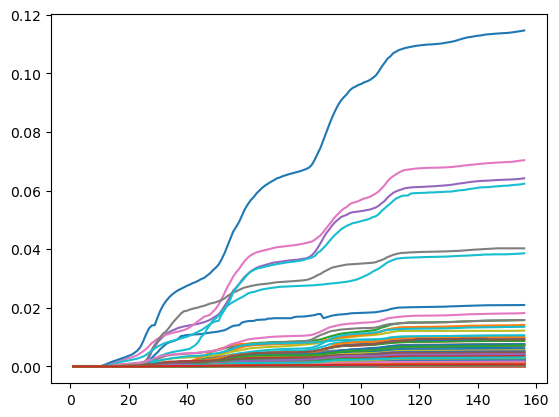

In [61]:
## Plot Data
x = np.arange(1, 157)

for y in np.arange(0, 254):
    plt.plot(x, norm_texas_weekly_deaths_raw[y,:])
    
## plt.legend()
plt.show()

### Daily COVID Deaths

In [62]:
## Partitition Data (texas.26 and texas.31 are the Out of OE and Unassigned Counties, respectively)
texas_deaths_conv = us_deaths_conv[us_deaths_conv['Province_State'] == 'Texas']

## Drop Out of OE and Unassigned Rows, no other rows are 0, no further drops required
texas_deaths_conv = texas_deaths_conv.drop(index = [2884, 2933])

In [63]:
## Create New Dataframe of Weekly Data
texas_deaths_data = texas_deaths_conv[texas_deaths_conv.columns[2:]]
texas_deaths_array = np.array(texas_deaths_data, dtype = 'float')

## Sum each 7-day interval to get the weekly totals
texas_weekly_deaths = np.zeros((36, 155))
for j in np.arange(0, 36):
    i = 1
    while (i <= 155):
        texas_weekly_deaths[j, i-1] = texas_deaths_array[j, i*7 - 1] + texas_deaths_array[j, i*7 - 2] + texas_deaths_array[j, i*7 - 3] + texas_deaths_array[j, i*7 - 4] + texas_deaths_array[j, i*7 - 5] + texas_deaths_array[j, i*7 - 6] + texas_deaths_array[j, i*7 - 7]
        i += 1

In [64]:
## Normalize the Data per 100,000
norm_texas_weekly_deaths = texas_weekly_deaths/100000

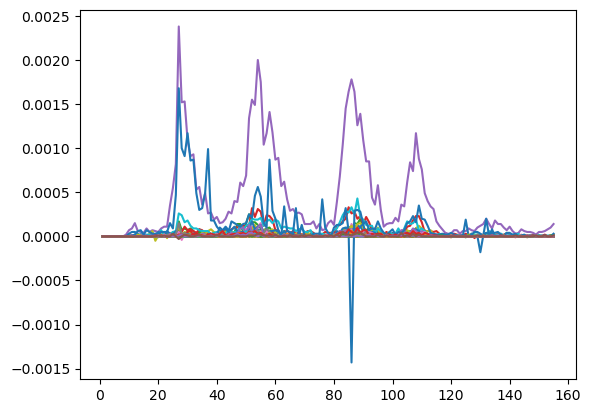

In [65]:
## Plot Data
x = np.arange(1, 156)

for y in np.arange(0, 36):
    plt.plot(x, norm_texas_weekly_deaths[y,:])
    
## plt.legend()
plt.show()

### Summary

Ignoring the bugs in the data (i.e. negative cases and deaths), the plots for the raw normalized weekly case and death data have roughly the same shape. Both of these plots showcase that for each county in Texas, the number of COVID cases and deaths increased and decreased over the same time periods. For the weekly cases, almost each county hit each of their sharpest inclines at around week 85. As for the number of COVID-related deaths, each county experienced a peak at around week 50, and again at around week 95. There is no significant shift/delay between the counties. After these peaks, the amount of cases and deaths appear to level off. One last thing to note is that the Total COVID cases appear to lead the the total COVID-related deaths, which intuitively makes sense. As cases increase, one would expect that the deaths would increase a few weeks later, and vice versa.

The plots for the convenient normalized weekly case and death data portray a similar picture to that of the raw normalized weekly cases and death data. As previously mentioned, with these daily totals, we can precisely see that texas suffered the worst around weeks 30, 50, 90, and 105. Each of these peaks were wide, spanning many weeks.

## Midwest - North Dakota (1)

### Raw COVID Cases

In [66]:
## Partition Data
nd_cases_raw = us_cases_raw[us_cases_raw['Province_State']=='North Dakota']

## Drop Out of ND and Unassigned Rows, no other rows are 0, no further drops required
nd_cases_raw = nd_cases_raw.drop(index = [2101, 2118])

In [67]:
## How many confirmed COVID cases in ND as of 12 January 2023
np.sum(nd_cases_raw['1/12/23'])

281092

In [68]:
## Proportion of nd who have contracted COVID (ND pop. = 774948)
np.sum(nd_cases_raw['1/12/23'])/774948

0.3627236924283952

In [69]:
## Create New Dataframe of Weekly Data
nd_cases_data = nd_cases_raw[nd_cases_raw.columns[11:]]
nd_cases_array = np.array(nd_cases_data)

nd_weekly_cases_raw = nd_cases_array[:, ::7]

In [70]:
## Normalize Data (per 100,000)
norm_nd_weekly_cases_raw = nd_weekly_cases_raw/100000

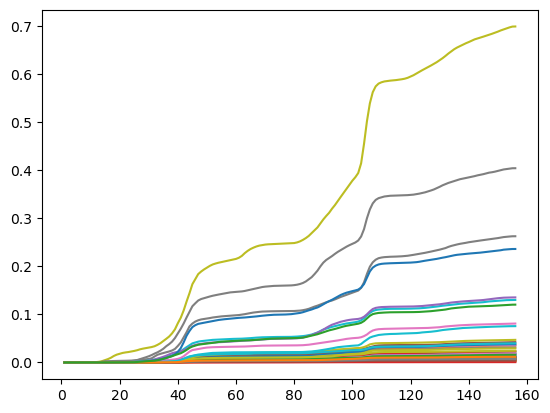

In [71]:
## Plot Data
x = np.arange(1, 157)

for y in np.arange(0, 53):
    plt.plot(x, norm_nd_weekly_cases_raw[y,:])
    
## plt.legend()
plt.show()

### Daily COVID Cases

In [72]:
## Partitition Data (nd.26 and nd.31 are the Out of OE and Unassigned Counties, respectively)
nd_cases_conv = us_cases_conv[us_cases_conv['Province_State'] == 'North Dakota']

## Drop Out of OE and Unassigned Rows, no other rows are 0, no further drops required
nd_cases_conv = nd_cases_conv.drop(index = [2102, 2119])

In [73]:
## Create New Dataframe of Weekly Data
nd_cases_data = nd_cases_conv[nd_cases_conv.columns[2:]]
nd_cases_array = np.array(nd_cases_data, dtype = 'float')

## Sum each 7-day interval to get the weekly totals
nd_weekly_cases = np.zeros((53, 155))
for j in np.arange(0, 53):
    i = 1
    while (i <= 155):
        nd_weekly_cases[j, i-1] = nd_cases_array[j, i*7 - 1] + nd_cases_array[j, i*7 - 2] + nd_cases_array[j, i*7 - 3] + nd_cases_array[j, i*7 - 4] + nd_cases_array[j, i*7 - 5] + nd_cases_array[j, i*7 - 6] + nd_cases_array[j, i*7 - 7]
        i += 1

In [74]:
## Normalize the Data per 100,000
norm_nd_weekly_cases = nd_weekly_cases/100000

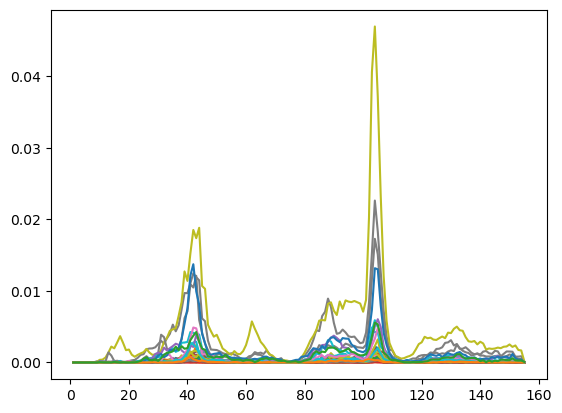

In [75]:
## Plot Data
x = np.arange(1, 156)

for y in np.arange(0, 53):
    plt.plot(x, norm_nd_weekly_cases[y,:])
    
## plt.legend()
plt.show()

### Raw COVID Deaths

In [76]:
## Partition Data
nd_deaths_raw = us_deaths_raw[us_deaths_raw['Province_State']=='North Dakota']

## Drop Out of OE and Unassigned Rows, no other rows are 0, no further drops required
nd_deaths_raw = nd_deaths_raw.drop(index = [2101, 2118])

In [77]:
## How many confirmed COVID cases in nd as of 12 January 2023
np.sum(nd_deaths_raw['1/12/23'])

2232

In [78]:
## Proportion of nd who have contracted COVID (OE pop. = 774948)
np.sum(nd_deaths_raw['1/12/23'])/774948

0.0028801932516762416

In [79]:
## Create New Dataframe of Weekly Data
nd_deaths_data = nd_deaths_raw[nd_deaths_raw.columns[12:]]
nd_deaths_array = np.array(nd_deaths_data)

nd_weekly_deaths_raw = nd_deaths_array[:, ::7]

In [80]:
## Normalize Data (per 100,000)
norm_nd_weekly_deaths_raw = nd_weekly_deaths_raw/100000

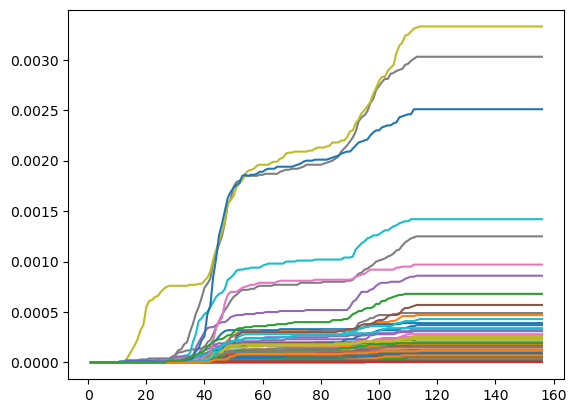

In [81]:
## Plot Data
x = np.arange(1, 157)

for y in np.arange(0, 53):
    plt.plot(x, norm_nd_weekly_deaths_raw[y,:])
    
## plt.legend()
plt.show()

### Daily COVID Deaths

In [82]:
## Partitition Data (nd.26 and nd.31 are the Out of OE and Unassigned Counties, respectively)
nd_deaths_conv = us_deaths_conv[us_deaths_conv['Province_State'] == 'North Dakota']

## Drop Out of OE and Unassigned Rows, no other rows are 0, no further drops required
nd_deaths_conv = nd_deaths_conv.drop(index = [2102, 2119])

In [83]:
## Create New Dataframe of Weekly Data
nd_deaths_data = nd_deaths_conv[nd_deaths_conv.columns[2:]]
nd_deaths_array = np.array(nd_deaths_data, dtype = 'float')

## Sum each 7-day interval to get the weekly totals
nd_weekly_deaths = np.zeros((53, 155))
for j in np.arange(0, 53):
    i = 1
    while (i <= 155):
        nd_weekly_deaths[j, i-1] = nd_deaths_array[j, i*7 - 1] + nd_deaths_array[j, i*7 - 2] + nd_deaths_array[j, i*7 - 3] + nd_deaths_array[j, i*7 - 4] + nd_deaths_array[j, i*7 - 5] + nd_deaths_array[j, i*7 - 6] + nd_deaths_array[j, i*7 - 7]
        i += 1

In [84]:
## Normalize the Data per 100,000
norm_nd_weekly_deaths = nd_weekly_deaths/100000

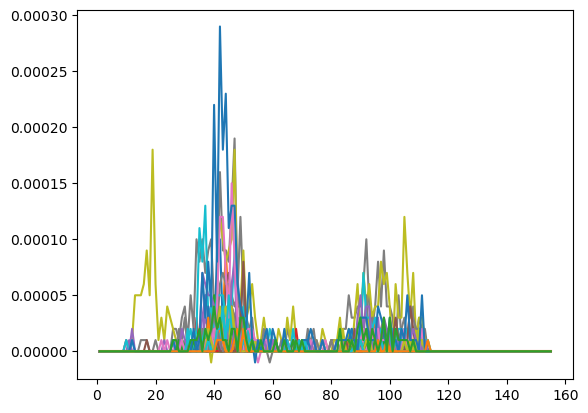

In [85]:
## Plot Data
x = np.arange(1, 156)

for y in np.arange(0, 53):
    plt.plot(x, norm_nd_weekly_deaths[y,:])
    
## plt.legend()
plt.show()

### Summary

The plots for the raw normalized weekly case and death data have roughly the same shape. Both of these plots showcase that for each county in North Dakota, the number of COVID cases and deaths increased and decreased over the same time periods. For the weekly cases, almost each county hit each of their sharpest inclines at around week 40.  As for the number of COVID-related deaths, each county experienced a peak at around week 42, and again at around week 100. One of the counties had a sharp peak eariler than the rest, with its first peak coming at around week 20. This signals that this county was the epicenter for the virus in North Dakota. Aside from that abnormality, there is no significant shift/delay between the counties. One last thing to note is that the Total COVID cases appear to lead the the total COVID-related deaths, which intuitively makes sense. As cases increase, one would expect that the deaths would increase a few weeks later, and vice versa.

The plots for the convenient normalized weekly case and death data portray a similar picture to that of the raw normalized weekly cases and death data. As previously mentioned, with these daily totals, we can precisely see that North Dakota suffered the worst around weeks 45, 100. However, interestingly, North Dakota appeared to struggle with purging the virus. Outbreaks were sustained throughout many, many weeks.

## Southeast - Louisiana (2)

### Raw COVID Cases

In [86]:
## Partition Data
louisiana_cases_raw = us_cases_raw[us_cases_raw['Province_State']=='Louisiana']

## Drop Out of OE and Unassigned Rows, no other rows are 0, no further drops required
louisiana_cases_raw = louisiana_cases_raw.drop(index = [1192, 1211])

In [87]:
## How many confirmed COVID cases in Louisiana as of 12 January 2023
np.sum(louisiana_cases_raw['1/12/23'])

1526852

In [88]:
## Proportion of Louisiana who have contracted COVID (LA pop. = 4533372)
np.sum(louisiana_cases_raw['1/12/23'])/4533372

0.33680271550625007

In [89]:
## Create New Dataframe of Weekly Data
louisiana_cases_data = louisiana_cases_raw[louisiana_cases_raw.columns[11:]]
louisiana_cases_array = np.array(louisiana_cases_data)

louisiana_weekly_cases_raw = louisiana_cases_array[:, ::7]

In [90]:
## Normalize Data (per 100,000)
norm_louisiana_weekly_cases_raw = louisiana_weekly_cases_raw/100000

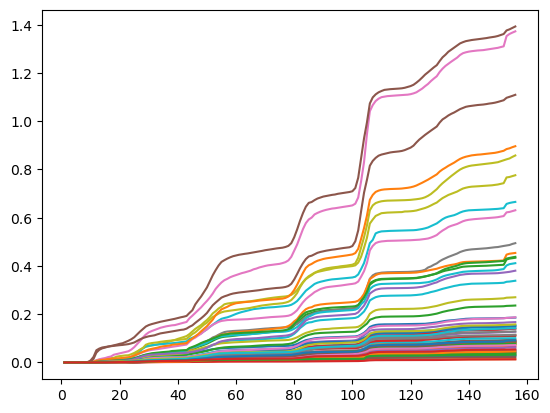

In [91]:
## Plot Data
x = np.arange(1, 157)

for y in np.arange(0, 64):
    plt.plot(x, norm_louisiana_weekly_cases_raw[y,:])
    
## plt.legend()
plt.show()

### Daily COVID Cases

In [92]:
## Partitition Data (louisiana.26 and louisiana.31 are the Out of OE and Unassigned Counties, respectively)
louisiana_cases_conv = us_cases_conv[us_cases_conv['Province_State'] == 'Louisiana']

## Drop Out of OE and Unassigned Rows, no other rows are 0, no further drops required
louisiana_cases_conv = louisiana_cases_conv.drop(index = [1193, 1212])

In [93]:
## Create New Dataframe of Weekly Data
louisiana_cases_data = louisiana_cases_conv[louisiana_cases_conv.columns[2:]]
louisiana_cases_array = np.array(louisiana_cases_data, dtype = 'float')

## Sum each 7-day interval to get the weekly totals
louisiana_weekly_cases = np.zeros((64, 155))
for j in np.arange(0, 64):
    i = 1
    while (i <= 155):
        louisiana_weekly_cases[j, i-1] = louisiana_cases_array[j, i*7 - 1] + louisiana_cases_array[j, i*7 - 2] + louisiana_cases_array[j, i*7 - 3] + louisiana_cases_array[j, i*7 - 4] + louisiana_cases_array[j, i*7 - 5] + louisiana_cases_array[j, i*7 - 6] + louisiana_cases_array[j, i*7 - 7]
        i += 1

In [94]:
## Normalize the Data per 100,000
norm_louisiana_weekly_cases = louisiana_weekly_cases/100000

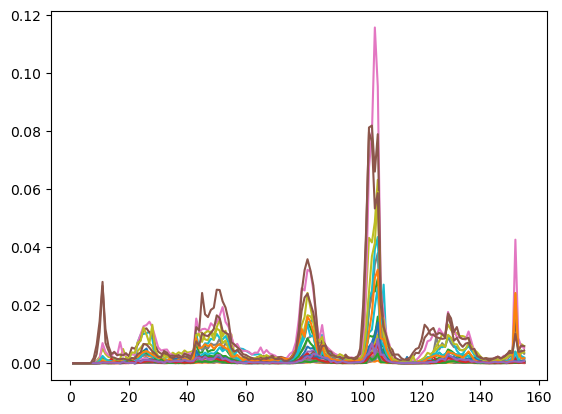

In [95]:
## Plot Data
x = np.arange(1, 156)

for y in np.arange(0, 36):
    plt.plot(x, norm_louisiana_weekly_cases[y,:])
    
## plt.legend()
plt.show()

### Raw COVID Deaths

In [96]:
## Partition Data
louisiana_deaths_raw = us_deaths_raw[us_deaths_raw['Province_State']=='Louisiana']

## Drop Out of OE and Unassigned Rows, no other rows are 0, no further drops required
louisiana_deaths_raw = louisiana_deaths_raw.drop(index = [1192, 1211])

In [97]:
## How many confirmed COVID cases in louisiana as of 12 January 2023
np.sum(louisiana_deaths_raw['1/12/23'])

18436

In [98]:
## Proportion of louisiana who have contracted COVID (OE pop. = 4240137)
np.sum(louisiana_deaths_raw['1/12/23'])/4240137

0.004347972718806019

In [99]:
## Create New Dataframe of Weekly Data
louisiana_deaths_data = louisiana_deaths_raw[louisiana_deaths_raw.columns[12:]]
louisiana_deaths_array = np.array(louisiana_deaths_data)

louisiana_weekly_deaths_raw = louisiana_deaths_array[:, ::7]

In [100]:
## Normalize Data (per 100,000)
norm_louisiana_weekly_deaths_raw = louisiana_weekly_deaths_raw/100000

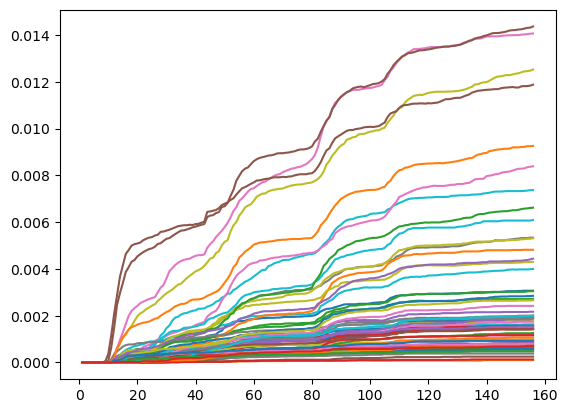

In [101]:
## Plot Data
x = np.arange(1, 157)

for y in np.arange(0, 64):
    plt.plot(x, norm_louisiana_weekly_deaths_raw[y,:])
    
## plt.legend()
plt.show()

### Daily COVID Deaths

In [102]:
## Partitition Data (louisiana.26 and louisiana.31 are the Out of OE and Unassigned Counties, respectively)
louisiana_deaths_conv = us_deaths_conv[us_deaths_conv['Province_State'] == 'Louisiana']

## Drop Out of OE and Unassigned Rows, no other rows are 0, no further drops required
louisiana_deaths_conv = louisiana_deaths_conv.drop(index = [1193, 1213])

In [103]:
## Create New Dataframe of Weekly Data
louisiana_deaths_data = louisiana_deaths_conv[louisiana_deaths_conv.columns[2:]]
louisiana_deaths_array = np.array(louisiana_deaths_data, dtype = 'float')

## Sum each 7-day interval to get the weekly totals
louisiana_weekly_deaths = np.zeros((64, 155))
for j in np.arange(0, 64):
    i = 1
    while (i <= 155):
        louisiana_weekly_deaths[j, i-1] = louisiana_deaths_array[j, i*7 - 1] + louisiana_deaths_array[j, i*7 - 2] + louisiana_deaths_array[j, i*7 - 3] + louisiana_deaths_array[j, i*7 - 4] + louisiana_deaths_array[j, i*7 - 5] + louisiana_deaths_array[j, i*7 - 6] + louisiana_deaths_array[j, i*7 - 7]
        i += 1

In [104]:
## Normalize the Data per 100,000
norm_louisiana_weekly_deaths = louisiana_weekly_deaths/100000

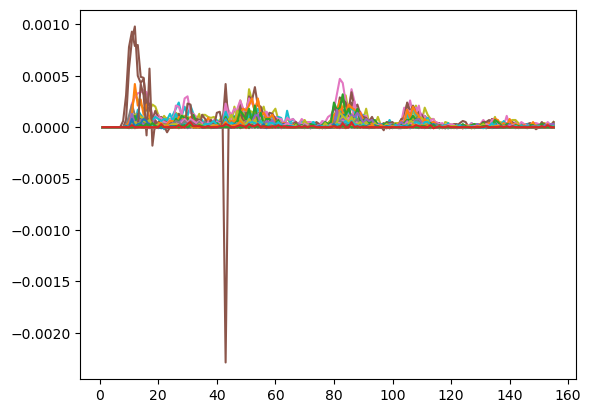

In [105]:
## Plot Data
x = np.arange(1, 156)

for y in np.arange(0, 64):
    plt.plot(x, norm_louisiana_weekly_deaths[y,:])
    
## plt.legend()
plt.show()

### Summary

Ignoring errors in the data, the plots for the raw normalized weekly case and death data have roughly the same shape. Both of these plots showcase that for each county in Louisiana, the number of COVID cases and deaths increased and decreased over the same time periods. For the weekly cases, almost each county hit each of their sharpest inclines early in the cycle at around week 105. As for the number of COVID-related deaths, each county experienced a peak at around week 45, and again at around week 85. There are a handful of counties that experienced the pandemic before the others. After these peaks, the amount of cases and deaths appear to level off. One last thing to note is that the Total COVID cases appear to lead the the total COVID-related deaths, which intuitively makes sense. As cases increase, one would expect that the deaths would increase a few weeks later, and vice versa.

The plots for the convenient normalized weekly case and death data portray a similar picture to that of the raw normalized weekly cases and death data. As previously mentioned, with these daily totals, we can precisely see that Louisiana suffered several outbreaks, with the majority of deaths coming from the first outbreak from weeks 0 to 20. However, for other peaks in cases and deaths, there were many more cases than deaths. This suggests that as time went on, Louisiana got better at treating the virus.

## Northeast - New Jersey (4)

### Raw COVID Cases

In [106]:
## Partition Data
nj_cases_raw = us_cases_raw[us_cases_raw['Province_State']=='New Jersey']

## Drop Out of OE and Unassigned Rows, no other rows are 0, no further drops required
nj_cases_raw = nj_cases_raw.drop(index = [1859, 1864])

In [108]:
## How many confirmed COVID cases in New Jersey as of 12 January 2023
np.sum(nj_cases_raw['1/12/23'])

2962658

In [109]:
## Proportion of nj who have contracted COVID (OE pop. = 9288994)
np.sum(nj_cases_raw['1/12/23'])/9288994

0.3189428263168218

In [110]:
## Create New Dataframe of Weekly Data
nj_cases_data = nj_cases_raw[nj_cases_raw.columns[11:]]
nj_cases_array = np.array(nj_cases_data)

nj_weekly_cases_raw = nj_cases_array[:, ::7]

In [111]:
## Normalize Data (per 100,000)
norm_nj_weekly_cases_raw = nj_weekly_cases_raw/100000

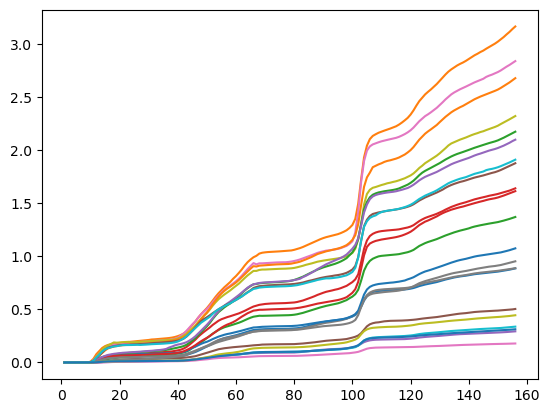

In [112]:
## Plot Data
x = np.arange(1, 157)

for y in np.arange(0, 21):
    plt.plot(x, norm_nj_weekly_cases_raw[y,:])
    
## plt.legend()
plt.show()

### Daily COVID Cases

In [113]:
## Partitition Data (nj.26 and nj.31 are the Out of OE and Unassigned Counties, respectively)
nj_cases_conv = us_cases_conv[us_cases_conv['Province_State'] == 'New Jersey']

## Drop Out of OE and Unassigned Rows, no other rows are 0, no further drops required
nj_cases_conv = nj_cases_conv.drop(index = [1860, 1865])

In [114]:
## Create New Dataframe of Weekly Data
nj_cases_data = nj_cases_conv[nj_cases_conv.columns[2:]]
nj_cases_array = np.array(nj_cases_data, dtype = 'float')

## Sum each 7-day interval to get the weekly totals
nj_weekly_cases = np.zeros((21, 155))
for j in np.arange(0, 21):
    i = 1
    while (i <= 155):
        nj_weekly_cases[j, i-1] = nj_cases_array[j, i*7 - 1] + nj_cases_array[j, i*7 - 2] + nj_cases_array[j, i*7 - 3] + nj_cases_array[j, i*7 - 4] + nj_cases_array[j, i*7 - 5] + nj_cases_array[j, i*7 - 6] + nj_cases_array[j, i*7 - 7]
        i += 1

In [115]:
## Normalize the Data per 100,000
norm_nj_weekly_cases = nj_weekly_cases/100000

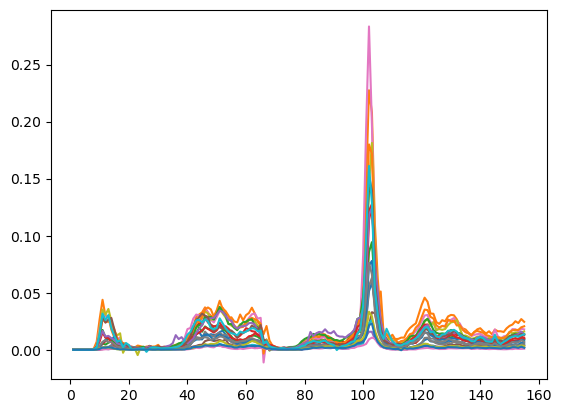

In [116]:
## Plot Data
x = np.arange(1, 156)

for y in np.arange(0, 21):
    plt.plot(x, norm_nj_weekly_cases[y,:])
    
## plt.legend()
plt.show()

### Raw COVID Deaths

In [117]:
## Partition Data
nj_deaths_raw = us_deaths_raw[us_deaths_raw['Province_State']=='New Jersey']

## Drop Out of OE and Unassigned Rows, no other rows are 0, no further drops required
nj_deaths_raw = nj_deaths_raw.drop(index = [1859, 1864])

In [118]:
## How many confirmed COVID cases in New Jersey as of 12 January 2023
np.sum(nj_deaths_raw['1/12/23'])

35652

In [119]:
## Proportion of nj who have contracted COVID (OE pop. = 9288994)
np.sum(nj_deaths_raw['1/12/23'])/9288994

0.0038380905402673315

In [120]:
## Create New Dataframe of Weekly Data
nj_deaths_data = nj_deaths_raw[nj_deaths_raw.columns[12:]]
nj_deaths_array = np.array(nj_deaths_data)

nj_weekly_deaths_raw = nj_deaths_array[:, ::7]

In [121]:
## Normalize Data (per 100,000)
norm_nj_weekly_deaths_raw = nj_weekly_deaths_raw/100000

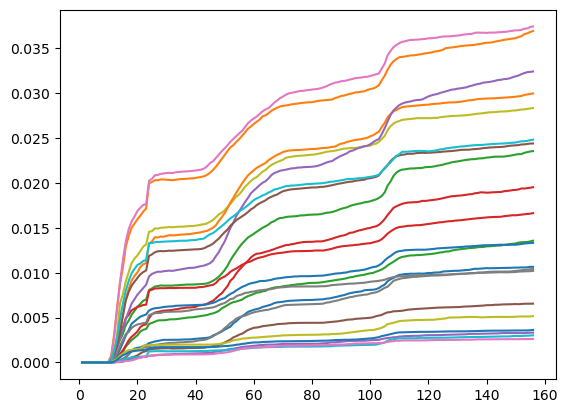

In [122]:
## Plot Data
x = np.arange(1, 157)

for y in np.arange(0, 21):
    plt.plot(x, norm_nj_weekly_deaths_raw[y,:])
    
## plt.legend()
plt.show()

### Daily COVID Deaths

In [123]:
## Partitition Data (nj.26 and nj.31 are the Out of OE and Unassigned Counties, respectively)
nj_deaths_conv = us_deaths_conv[us_deaths_conv['Province_State'] == 'New Jersey']

## Drop Out of OE and Unassigned Rows, no other rows are 0, no further drops required
nj_deaths_conv = nj_deaths_conv.drop(index = [1860, 1865])

In [124]:
## Create New Dataframe of Weekly Data
nj_deaths_data = nj_deaths_conv[nj_deaths_conv.columns[2:]]
nj_deaths_array = np.array(nj_deaths_data, dtype = 'float')

## Sum each 7-day interval to get the weekly totals
nj_weekly_deaths = np.zeros((21, 155))
for j in np.arange(0, 21):
    i = 1
    while (i <= 155):
        nj_weekly_deaths[j, i-1] = nj_deaths_array[j, i*7 - 1] + nj_deaths_array[j, i*7 - 2] + nj_deaths_array[j, i*7 - 3] + nj_deaths_array[j, i*7 - 4] + nj_deaths_array[j, i*7 - 5] + nj_deaths_array[j, i*7 - 6] + nj_deaths_array[j, i*7 - 7]
        i += 1

In [125]:
## Normalize the Data per 100,000
norm_nj_weekly_deaths = nj_weekly_deaths/100000

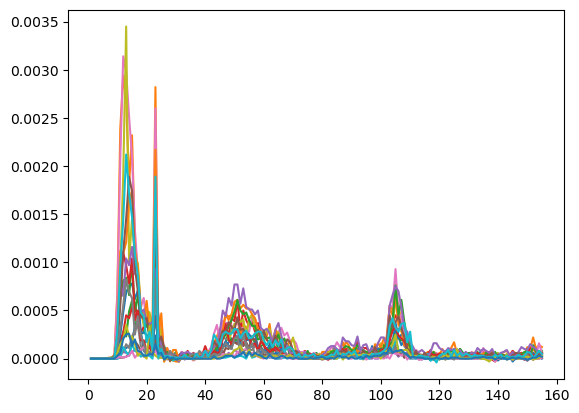

In [126]:
## Plot Data
x = np.arange(1, 156)

for y in np.arange(0, 21):
    plt.plot(x, norm_nj_weekly_deaths[y,:])
    
## plt.legend()
plt.show()

### Summary

The plots for the raw normalized weekly case and death data have roughly the same shape. Both of these plots showcase that for each county in New Jersey, the number of COVID cases and deaths increased and decreased over the same time periods. For the weekly cases, almost each county hit each of their sharpest inclines at around week 105. This was the first major peak in cases. This signals that New Jersey was one of the better states at mitigating the spread of the virus. There is no significant shift/delay between the counties. After these peaks, the amount of cases and deaths appear to level off. One last thing to note is that the Total COVID cases appear to lead the the total COVID-related deaths, which intuitively makes sense. As cases increase, one would expect that the deaths would increase a few weeks later, and vice versa.

The plots for the convenient normalized weekly case and death data portray a similar picture to that of the raw normalized weekly cases and death data. As previously mentioned, with these daily totals, we can precisely see that New Jersey suffered the worst around week 105 and a few other proportionately small outbreaks. 

# State by State Comparisons

The local maxima do not occur in the same weeks for all six states. New Jersey appears to be a leading state. This state had many outbreaks of the virus, both in terms of total cases and total related deaths. The next earliest outbreak in terms of cases comes from North Dakota in week 40. The other 4 states managed until their biggest outbreaks from weeks 85-105. As noted before, the death totals lag behind those for total cases. This pattern largely followed when examining the death totals as well. This discrepancy can likely be attributed to each state's geography and volume of travel and proximity to travel hubs. It makes sense that New Jersey was one of the first states to experience a major outbreak due to all the people who travel through New York City. The rest are all generally sparsely populated states, with no major travel hub comparable to NYC, making it harder for the virus to spread. However, this explaination does not fit for North Dakota which had its first major peak at week 40. This appears to be an anomally in the data.

The normalized values are roughly comparable for every state besides Texas. In terms of normalization, Texas had the worst of it. Its COVID tolls are at least 4 times that of any other state included in this report. Its peak normalized RAW weekly cases are 4 times that at 12 per 100000. Its peak normalized CONV weekly cases are 4 times that of the next greatest at 0.5 per 100000. Its peak normalized RAW weekly deaths stand at 0.12 per 100000, 10 times that of the next greatest. Finally, its CONV weekly deaths stand at 0.0025 per 100000.

In general, famously 'red' (Republican-led States) like Texas, North Dakota and Louisiana had more significant outbreaks than the rest.

According to the CDC website, Oregon has achieved a vaccination rating of 86.7\% for one dose, 77.9\% for two doses, and 25.2\% of the population getting a bivalent booster for those over the age of 18. Oregon achieved a majority vaccinated populating before July 1st, 2021, which is around week 78 of our data. At this point, Oregon had already had its first peak of cases and deaths, but had decreased almost back down to around 0 daily cases. The data peaked again, signaling a relaxation of mask mandates and social distancing measures.

According to the CDC website, Idaho has achieved a vaccination rating of 70.5\% for one dose, 63.2\% for two doses, and 25.8\% of the population getting a bivalent booster. At around week 78 of our data, when vaccines were largely available, Idaho had already had its first peak of cases and deaths, but had decreased almost back down to around 0 daily cases. The data peaked again, signaling a relaxation of mask mandates and social distancing measures. This is confirmed by a February 2022 bill that passed in the Idaho State Government prohibiting the government from mandating masks in public spaces.

According to the CDC website, Texas has achieved a vaccination rating of 76.95\% for one dose, 63.68\% for two doses, with no data available for the population getting a bivalent booster. Texas had multiple, sustained outbreaks of COVID cases and deaths, both before vaccines were readily available and after. This demonstrates a lack of adequate precaution taken by the state government to protect its people from the disease. In fact, Greg Abbott, the governer of Texas issued an executive order on July 29th 2021, prohibiting the state, as well as local governments from requiring its citizens to wear masks. This explains the multiple prolonged peaks.

According to the CDC website, North Dakota has achieved a vaccination rating of 59.8\% for two doses, and 27.5\% of the population getting a bivalent booster. This helps us understand why North Dakota struggled with virus outbreaks. With a bare majority of the population vaccinated against the virus, outbreaks are hard to manage. In fact, the North Dakota state government rescinded the state-wide mask mandate on January 18st, 2021. The lack of proper virus mitigation is potentially another explaination for the long-term outbreaks.

According to the CDC website, Louisiana has achieved a vaccination rating of 59\% for one dose and 53\% for two doses. As previously mentioned, Louisiana experienced multiple outbreaks, but over time, got better at treating cases. This goes to show that despite adequate safety procedures, Louisiana got lucky. 

According to the CDC website, New Jersey has achieved a vaccination rating of nearly 97\% for people over the age of 18. This makes New Jersey the most well-vaccinated state analyzed in this study. Despite a few peaks, New Jersey was able to stay consistant with managing outbreaks well. This suggests proper measures were put in place to migitate the potential spread of the virus.

Although Texas did not have the worst vaccination rating and was not the first to prohibit local and state governments from putting proper safety measures in place to mitigate the spread of the virus, the pattern identified from the normalized values follow. Thus, there is a correlation between the two. Roughly, it appears that those states that did not prioritize vaccinating its population or upholding mask mandates and social distancing measures faired worse than those that did. Based on the data, it appears as though that COVID safety policies like vaccination or mask mandates helped in mitigating the spread of the virus.

# Global Data - Southern Asia (8)

In [127]:
## Load the Continent Data File
path5 = 'continents2.csv'
continents = pd.read_csv(path5)

In [128]:
## Filter out all countries in Southern Asia
s_asia_country_list = continents[continents['sub-region'] == 'Southern Asia']

In [129]:
## Get List of Country Names to Filter COVID Data Files
s_asia_country_list['name']

0      Afghanistan
18      Bangladesh
25          Bhutan
103          India
105           Iran
135       Maldives
155          Nepal
168       Pakistan
210      Sri Lanka
Name: name, dtype: object

### Load the Global Data

In [130]:
path6 = 'RAW_global_confirmed_cases.csv'
global_cases_raw = pd.read_csv(path6)

In [131]:
path7 = 'CONVENIENT_global_confirmed_cases.csv'
global_cases_conv = pd.read_csv(path7, header = None, low_memory = False)

global_cases_conv = global_cases_conv.transpose()
global_cases_conv.rename(columns = global_cases_conv.iloc[0], inplace = True)
global_cases_conv = global_cases_conv.drop(0)

In [132]:
path8 = 'RAW_global_deaths.csv'
global_deaths_raw = pd.read_csv(path8)

In [133]:
path9 = 'CONVENIENT_global_confirmed_cases.csv'
global_deaths_conv = pd.read_csv(path7, header = None, low_memory = False)

global_deaths_conv = global_deaths_conv.transpose()
global_deaths_conv.rename(columns = global_deaths_conv.iloc[0], inplace = True)
global_deaths_conv = global_deaths_conv.drop(0)

### Raw COVID Cases

In [134]:
## Partition Data
s_asia_cases_raw = global_cases_raw.loc[[0, 21, 27, 148, 150, 179, 195, 210, 242]]

In [135]:
## How many confirmed COVID cases in s_asia as of 12 January 2023
np.sum(s_asia_cases_raw['1/12/23'])

57986864

In [136]:
## Proportion of s_asia who have contracted COVID (OE pop. = 4240137)
np.sum(s_asia_cases_raw['1/12/23'])/(41290608 + 169827626 + 777486 + 1416533286 + 86888023 + 521457 + 30548490 + 232477232 + 21654618)

0.028985912677434608

In [137]:
## Create New Dataframe of Weekly Data
s_asia_cases_data = s_asia_cases_raw[s_asia_cases_raw.columns[4:]]
s_asia_cases_array = np.array(s_asia_cases_data)

s_asia_weekly_cases_raw = s_asia_cases_array[:, ::7]

In [138]:
## Normalize Data (per 100,000)
norm_s_asia_weekly_cases_raw = s_asia_weekly_cases_raw/100000

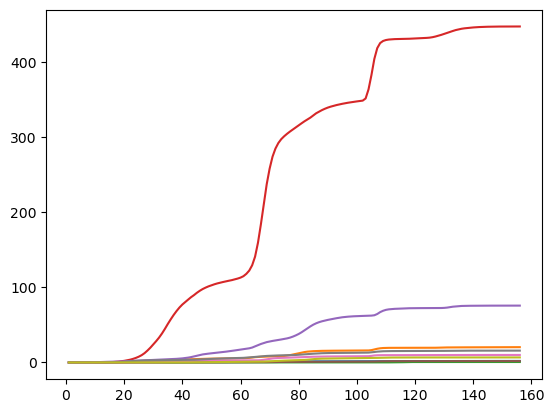

In [139]:
## Plot Data
x = np.arange(1, 157)

for y in np.arange(0, 9):
    plt.plot(x, norm_s_asia_weekly_cases_raw[y,:])
    
## plt.legend()
plt.show()

### Daily COVID Cases

In [140]:
## Partition Data
s_asia_cases_conv = global_cases_conv.loc[[1, 22, 28, 149, 151, 180, 196, 211, 243]]

In [141]:
## Create New Dataframe of Weekly Data
s_asia_cases_data = s_asia_cases_conv[s_asia_cases_conv.columns[2:]]
s_asia_cases_array = np.array(s_asia_cases_data, dtype = 'float')

## Sum each 7-day interval to get the weekly totals
s_asia_weekly_cases = np.zeros((9, 155))
for j in np.arange(0, 9):
    i = 1
    while (i <= 155):
        s_asia_weekly_cases[j, i-1] = s_asia_cases_array[j, i*7 - 1] + s_asia_cases_array[j, i*7 - 2] + s_asia_cases_array[j, i*7 - 3] + s_asia_cases_array[j, i*7 - 4] + s_asia_cases_array[j, i*7 - 5] + s_asia_cases_array[j, i*7 - 6] + s_asia_cases_array[j, i*7 - 7]
        i += 1

In [142]:
## Normalize the Data per 100,000
norm_s_asia_weekly_cases = s_asia_weekly_cases/100000

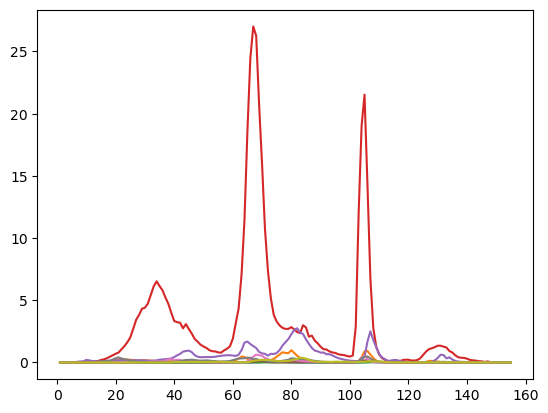

In [143]:
## Plot Data
x = np.arange(1, 156)

for y in np.arange(0, 9):
    plt.plot(x, norm_s_asia_weekly_cases[y,:])
    
## plt.legend()
plt.show()

### Raw COVID Deaths

In [144]:
## Partition Data
s_asia_deaths_raw = global_deaths_raw.loc[[0, 21, 27, 148, 150, 179, 195, 210, 242]]

In [145]:
## How many confirmed COVID cases in Southern Asia as of 12 January 2023
np.sum(s_asia_deaths_raw['1/12/23'])

772554

In [146]:
## Proportion of Southern Asia who have contracted COVID (Pops. are summed individually)
np.sum(s_asia_deaths_raw['1/12/23'])/(41290608 + 169827626 + 777486 + 1416533286 + 86888023 + 521457 + 30548490 + 232477232 + 21654618)

0.0003861768207124085

In [147]:
## Create New Dataframe of Weekly Data
s_asia_deaths_data = s_asia_deaths_raw[s_asia_deaths_raw.columns[12:]]
s_asia_deaths_array = np.array(s_asia_deaths_data)

s_asia_weekly_deaths_raw = s_asia_deaths_array[:, ::7]

In [148]:
## Normalize Data (per 100,000)
norm_s_asia_weekly_deaths_raw = s_asia_weekly_deaths_raw/100000

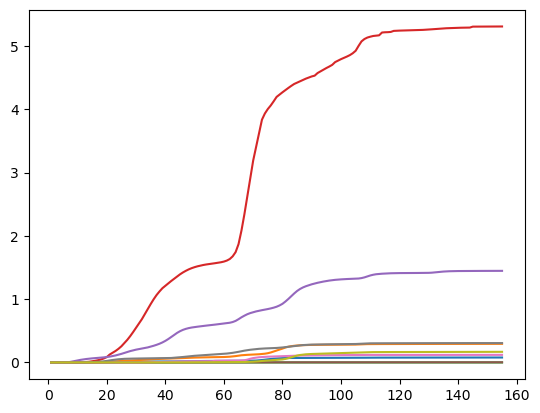

In [149]:
## Plot Data
x = np.arange(1, 156)

for y in np.arange(0, 9):
    plt.plot(x, norm_s_asia_weekly_deaths_raw[y,:])
    
## plt.legend()
plt.show()

### Daily COVID Deaths

In [150]:
## Partition Data
s_asia_deaths_conv = global_deaths_conv.loc[[1, 22, 28, 149, 151, 180, 196, 211, 243]]

In [151]:
## Create New Dataframe of Weekly Data
s_asia_deaths_data = s_asia_deaths_conv[s_asia_deaths_conv.columns[2:]]
s_asia_deaths_array = np.array(s_asia_deaths_data, dtype = 'float')

## Sum each 7-day interval to get the weekly totals
s_asia_weekly_deaths = np.zeros((9, 155))
for j in np.arange(0, 9):
    i = 1
    while (i <= 155):
        s_asia_weekly_deaths[j, i-1] = s_asia_deaths_array[j, i*7 - 1] + s_asia_deaths_array[j, i*7 - 2] + s_asia_deaths_array[j, i*7 - 3] + s_asia_deaths_array[j, i*7 - 4] + s_asia_deaths_array[j, i*7 - 5] + s_asia_deaths_array[j, i*7 - 6] + s_asia_deaths_array[j, i*7 - 7]
        i += 1

In [152]:
## Normalize the Data per 100,000
norm_s_asia_weekly_deaths = s_asia_weekly_deaths/100000

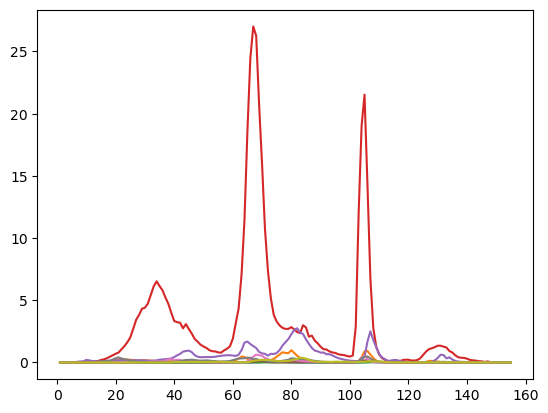

In [153]:
## Plot Data
x = np.arange(1, 156)

for y in np.arange(0, 9):
    plt.plot(x, norm_s_asia_weekly_deaths[y,:])
    
## plt.legend()
plt.show()

### Summary

Unlike the plots constructed for each U.S. state analyzed in this report, the raw normalized weekly case and death data for the countries of Southern Asia do not have roughly the same shape. Based on the plots, the India ('red' line) experienced the worst of COVID. Both of these plots showcase that for India's COVID case and death totals dwarfed every other country in the region. India suffered its worst spike in both total cases and total deaths shortly after week 60. These totals appear to grow faster as well when compared to the other countries. This is most likely due to the sheer size of India's population relative to the other nations in the region, even with normalizing. Aside from India, each other country experienced roughly the same trajectory of COVID. One last thing to note is that the Total COVID cases appear to lead the the total COVID-related deaths, which intuitively makes sense. As cases increase, one would expect that the deaths would increase a few weeks later, and vice versa.

The plots for the convenient normalized weekly case and death data portray a similar picture to that of the raw normalized weekly cases and death data. As previously mentioned, with these daily totals, we can precisely see how much India dwarfes the competition even with the normalization. India suffered the worst around weeks 30, 65, and 105. Other countries had small spikes, but none of these are significant in comparison.